<h1 style="text-align:center; color:green; font-size:48px;">
Step 1: Base Heating Network
</h1>

#### Install libraries (if you did not do it before on the terminal)

In [9]:
# !pip install numpy==2.0.2 pandas==2.3.1
# !pip install matplotlib
# !pip install git+https://github.com/oemof/dhnx.git@dev
# !pip install osmnx==1.9.4 oemof.solph==0.5.6

# Import libraries

In [10]:
import matplotlib.pyplot as plt
import dhnx
import pandas as pd
import oemof.solph
from pyomo.environ import SolverFactory


## 1.1 Create network and plot

In [11]:
# Initialize thermal network
network = dhnx.network.ThermalNetwork()

# Load town parameter
network = network.from_csv_folder(r"STEP_1/twn_data")
    
# Load investment parameter
invest_opt = dhnx.input_output.load_invest_options(r"STEP_1/invest_data")

No sequences found to create timeindex from


In [12]:
print(network)

dhnx.network.ThermalNetwork object with these components
 * 2 producers
 * 5 consumers
 * 5 forks
 * 14 pipes



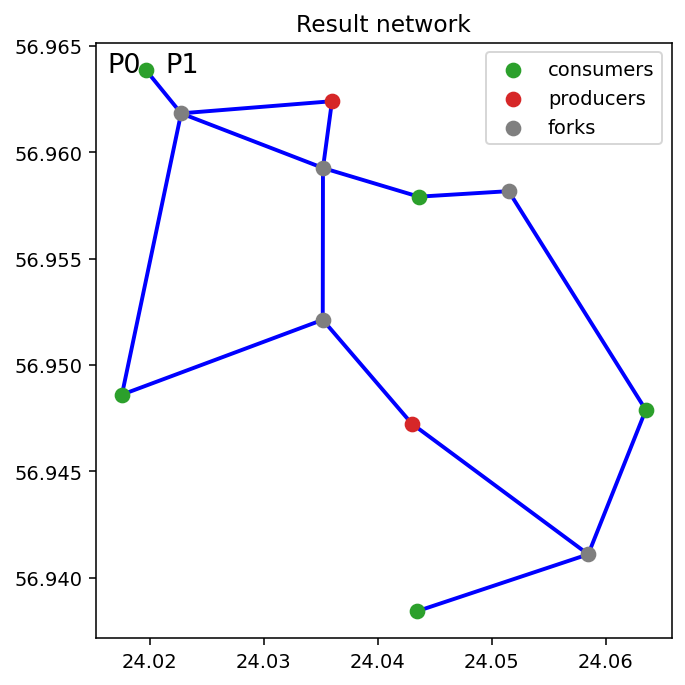

In [ ]:
# plot invested edges
plt.rcParams['figure.figsize'] = (10, 8)   # <-- bigger
plt.rcParams['figure.dpi'] = 140

static_map_1 = dhnx.plotting.StaticMap(network)
static_map_1.draw(background_map=False)
ax = plt.gca()
ax.set_title('Result network')

# Scatter points
plt.scatter(network.components.consumers['lon'], network.components.consumers['lat'],
            color='tab:green', label='consumers', zorder=2.5, s=50)
plt.scatter(network.components.producers['lon'], network.components.producers['lat'],
            color='tab:red', label='producers', zorder=2.5, s=50)
plt.scatter(network.components.forks['lon'], network.components.forks['lat'],
            color='tab:grey', label='forks', zorder=2.5, s=50)

# labels that DON'T expand the axis extent
# plt.text(0.02, 0.95, 'P0', transform=ax.transAxes, fontsize=14)
# plt.text(0.12, 0.95, 'P1', transform=ax.transAxes, fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

## 1.2 Investment optimization of the network

In [14]:
# Optimize the investment data
# Check available solvers and use an appropriate one
available_solvers = ['gurobi', 'cbc', 'glpk']
solver_to_use = None

for solver in available_solvers:
	if SolverFactory(solver).available():
		solver_to_use = solver
		print(f"Using solver: {solver}")
		break

network.optimize_investment(invest_options=invest_opt,  solver=solver_to_use)

INFO:dhnx.optimization.optimization_models:Initialize the energy system
INFO:dhnx.optimization.optimization_models:Create oemof objects
INFO:dhnx.optimization.optimization_models:Producers, Consumers Nodes appended.
c:\Users\irfan\anaconda3\envs\env_P2\lib\site-packages\oemof\solph\flows\_flow.py:163: FutureWarning: For backward compatibility, the option investment overwrites the option nominal_value. Both options cannot be set at the same time.
  warn(msg, FutureWarning)
c:\Users\irfan\anaconda3\envs\env_P2\lib\site-packages\oemof\network\network\nodes.py:250: FutureWarning: Usage of oemof.network.Component is deprecated. Use oemof.network.Node instead.
  warnings.warn(
INFO:dhnx.optimization.optimization_models:DHS Nodes appended.


Using solver: gurobi


INFO:dhnx.optimization.optimization_models:Energysystem has been created
INFO:dhnx.optimization.optimization_models:Build the operational model
INFO:dhnx.optimization.optimization_models:Solve the optimization problem
INFO:gurobipy:Read LP format model from file C:\Users\irfan\AppData\Local\Temp\tmpoewlv33o.pyomo.lp
INFO:gurobipy:Reading time = 0.05 seconds
INFO:gurobipy:x1: 300 rows, 258 columns, 674 nonzeros
INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))
INFO:gurobipy:


Read LP format model from file C:\Users\irfan\AppData\Local\Temp\tmpoewlv33o.pyomo.lp
Reading time = 0.05 seconds
x1: 300 rows, 258 columns, 674 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))



INFO:gurobipy:CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]


CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


INFO:gurobipy:Optimize a model with 300 rows, 258 columns and 674 nonzeros


Optimize a model with 300 rows, 258 columns and 674 nonzeros


INFO:gurobipy:Model fingerprint: 0x198526f0
INFO:gurobipy:Variable types: 226 continuous, 32 integer (32 binary)
INFO:gurobipy:Coefficient statistics:
INFO:gurobipy:  Matrix range     [4e-04, 7e+03]
INFO:gurobipy:  Objective range  [8e+01, 2e+07]
INFO:gurobipy:  Bounds range     [1e+00, 7e+03]


Model fingerprint: 0x198526f0
Variable types: 226 continuous, 32 integer (32 binary)
Coefficient statistics:
  Matrix range     [4e-04, 7e+03]
  Objective range  [8e+01, 2e+07]
  Bounds range     [1e+00, 7e+03]


INFO:gurobipy:  RHS range        [1e+02, 3e+03]


  RHS range        [1e+02, 3e+03]


INFO:gurobipy:Presolve removed 258 rows and 200 columns


Presolve removed 258 rows and 200 columns


INFO:gurobipy:Presolve time: 0.01s
INFO:gurobipy:Presolved: 42 rows, 58 columns, 154 nonzeros
INFO:gurobipy:Variable types: 36 continuous, 22 integer (22 binary)
INFO:gurobipy:Found heuristic solution: objective 7.474309e+07


Presolve time: 0.01s
Presolved: 42 rows, 58 columns, 154 nonzeros
Variable types: 36 continuous, 22 integer (22 binary)
Found heuristic solution: objective 7.474309e+07


INFO:gurobipy:Found heuristic solution: objective 6.511902e+07
INFO:gurobipy:
INFO:gurobipy:Root relaxation: objective 3.604835e+07, 36 iterations, 0.00 seconds (0.00 work units)


Found heuristic solution: objective 6.511902e+07

Root relaxation: objective 3.604835e+07, 36 iterations, 0.00 seconds (0.00 work units)


INFO:gurobipy:
INFO:gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work
INFO:gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time
INFO:gurobipy:



    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time



INFO:gurobipy:     0     0 3.6048e+07    0    6 6.5119e+07 3.6048e+07  44.6%     -    0s
INFO:gurobipy:H    0     0                    5.816088e+07 3.6048e+07  38.0%     -    0s
INFO:gurobipy:H    0     0                    5.491591e+07 3.6048e+07  34.4%     -    0s


     0     0 3.6048e+07    0    6 6.5119e+07 3.6048e+07  44.6%     -    0s
H    0     0                    5.816088e+07 3.6048e+07  38.0%     -    0s
H    0     0                    5.491591e+07 3.6048e+07  34.4%     -    0s


INFO:gurobipy:     0     0 4.4452e+07    0    8 5.4916e+07 4.4452e+07  19.1%     -    0s


     0     0 4.4452e+07    0    8 5.4916e+07 4.4452e+07  19.1%     -    0s


INFO:gurobipy:     0     0 4.5731e+07    0    8 5.4916e+07 4.5731e+07  16.7%     -    0s
INFO:gurobipy:     0     0 4.7172e+07    0    7 5.4916e+07 4.7172e+07  14.1%     -    0s
INFO:gurobipy:     0     0 4.7172e+07    0    5 5.4916e+07 4.7172e+07  14.1%     -    0s


     0     0 4.5731e+07    0    8 5.4916e+07 4.5731e+07  16.7%     -    0s
     0     0 4.7172e+07    0    7 5.4916e+07 4.7172e+07  14.1%     -    0s
     0     0 4.7172e+07    0    5 5.4916e+07 4.7172e+07  14.1%     -    0s


INFO:gurobipy:     0     0 5.1495e+07    0    5 5.4916e+07 5.1495e+07  6.23%     -    0s


     0     0 5.1495e+07    0    5 5.4916e+07 5.1495e+07  6.23%     -    0s


INFO:gurobipy:     0     0 5.2107e+07    0    3 5.4916e+07 5.2107e+07  5.11%     -    0s


     0     0 5.2107e+07    0    3 5.4916e+07 5.2107e+07  5.11%     -    0s


INFO:gurobipy:     0     0 5.3954e+07    0    2 5.4916e+07 5.3954e+07  1.75%     -    0s
INFO:gurobipy:     0     0 5.3954e+07    0    3 5.4916e+07 5.3954e+07  1.75%     -    0s


     0     0 5.3954e+07    0    2 5.4916e+07 5.3954e+07  1.75%     -    0s
     0     0 5.3954e+07    0    3 5.4916e+07 5.3954e+07  1.75%     -    0s


INFO:gurobipy:
INFO:gurobipy:Cutting planes:
INFO:gurobipy:  Learned: 6
INFO:gurobipy:  Gomory: 1



Cutting planes:
  Learned: 6
  Gomory: 1


INFO:gurobipy:  Cover: 2
INFO:gurobipy:  Implied bound: 6


  Cover: 2
  Implied bound: 6


INFO:gurobipy:  Clique: 2


  Clique: 2


INFO:gurobipy:  MIR: 3


  MIR: 3


INFO:gurobipy:  Flow cover: 4


  Flow cover: 4



INFO:gurobipy:
INFO:gurobipy:Explored 1 nodes (95 simplex iterations) in 0.22 seconds (0.00 work units)
INFO:gurobipy:Thread count was 8 (of 8 available processors)


Explored 1 nodes (95 simplex iterations) in 0.22 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)


INFO:gurobipy:


INFO:gurobipy:Solution count 4: 5.49159e+07 5.81609e+07 6.5119e+07 7.47431e+07 


Solution count 4: 5.49159e+07 5.81609e+07 6.5119e+07 7.47431e+07 


INFO:gurobipy:


INFO:gurobipy:Optimal solution found (tolerance 1.00e-04)


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy:Best objective 5.491590558414e+07, best bound 5.491590558414e+07, gap 0.0000%


Best objective 5.491590558414e+07, best bound 5.491590558414e+07, gap 0.0000%


INFO:root:Optimization successful...


## 1.3 Results postprocessing and Plotting 


In [15]:
# ####### Postprocessing and Plotting ###########
results_edges = network.results.optimization['components']['pipes']
print(results_edges[['from_node', 'to_node', 'hp_type', 'capacity',
                     'direction', 'costs', 'losses']])

results_edges.to_csv("STEP_1/Outputs/Optimum_network_base.csv", index=True)

print('Objective value: ', network.results.optimization['oemof_meta']['objective'])

# assign new ThermalNetwork with invested pipes
twn_results = network
twn_results.components['pipes'] = results_edges[results_edges['capacity'] > 0.001]



      from_node      to_node hp_type     capacity  direction         costs  \
id                                                                           
0       forks-3  consumers-0    DN80   908.680965          1  1.974306e+06   
1   producers-1      forks-3    DN80   917.365611          1  5.362870e+06   
2   producers-1      forks-0    DN80   315.628930          1  2.197392e+06   
3       forks-3      forks-0    None     0.000000          0  0.000000e+00   
4       forks-3  consumers-1    None     0.000000          0  0.000000e+00   
5       forks-0      forks-2    None     0.000000          0  0.000000e+00   
6       forks-0  consumers-2    DN80   312.583671          1  3.310496e+06   
7       forks-1  consumers-2    None     0.000000          0  0.000000e+00   
8       forks-1  consumers-3    None     0.000000          0  0.000000e+00   
9       forks-2  producers-0    DN80  1447.839438         -1  5.069843e+06   
10  producers-0      forks-4   DN125  2825.148539          1  1.

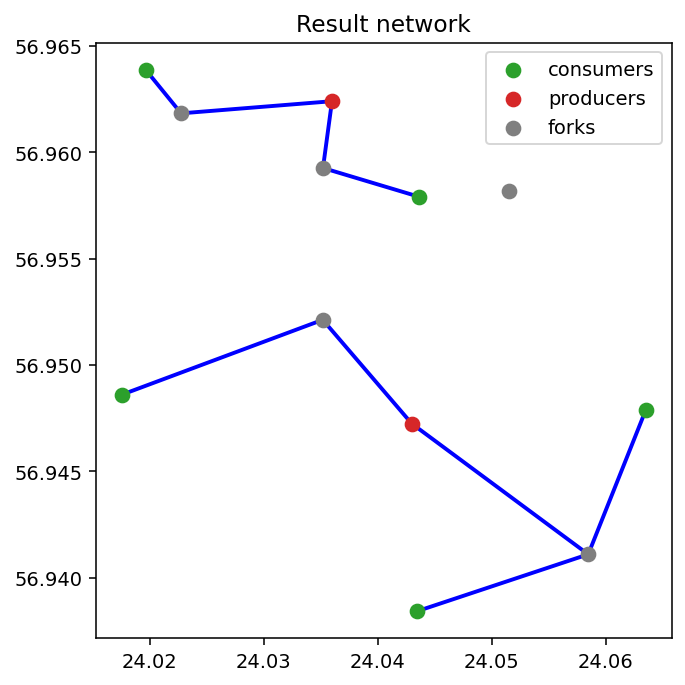

In [17]:
# plot invested edges
plt.rcParams['figure.figsize'] = (10, 8)   # <-- bigger
plt.rcParams['figure.dpi'] = 140

static_map_2 = dhnx.plotting.StaticMap(twn_results)
static_map_2.draw(background_map=False)
ax = plt.gca()
ax.set_title('Result network')

# Scatter points
plt.scatter(network.components.consumers['lon'], network.components.consumers['lat'],
            color='tab:green', label='consumers', zorder=2.5, s=50)
plt.scatter(network.components.producers['lon'], network.components.producers['lat'],
            color='tab:red', label='producers', zorder=2.5, s=50)
plt.scatter(network.components.forks['lon'], network.components.forks['lat'],
            color='tab:grey', label='forks', zorder=2.5, s=50)

# labels that DON'T expand the axis extent
# plt.text(0.02, 0.95, 'P0', transform=ax.transAxes, fontsize=14)
# plt.text(0.12, 0.95, 'P1', transform=ax.transAxes, fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

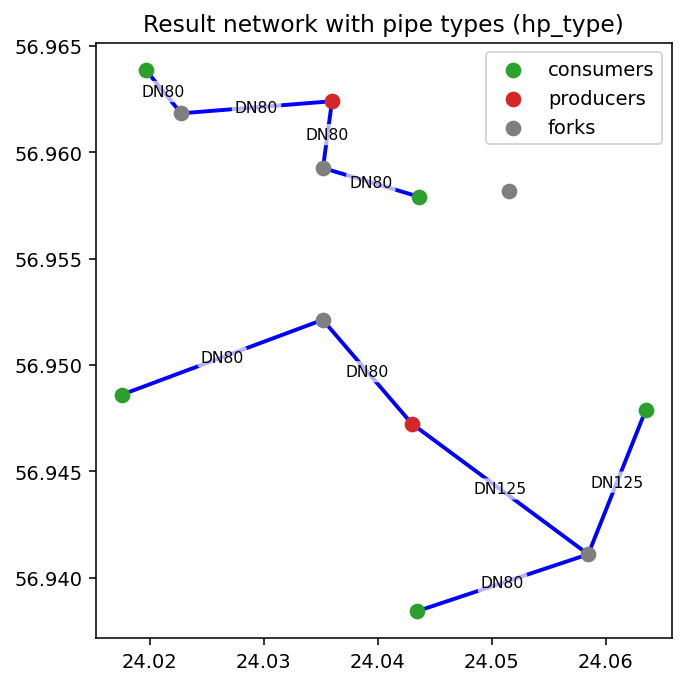

In [18]:

# ---------- Load selected pipes from STEP 1 ----------
results_edges = pd.read_csv("STEP_1/outputs/Optimum_network_base.csv", index_col=0)

# keep only invested pipes
pipes_selected = results_edges[results_edges["capacity"] > 0.001].copy()

# ---------- Update network with invested pipes ----------
# assumes 'network' already exists from previous steps
twn_results = network
twn_results.components['pipes'] = pipes_selected

# helper to get node coordinates from names like "consumers-0", "producers-1", "forks-2"
def get_node_coords(node_name):
    comp_type, idx = node_name.split("-", 1)          # e.g. "consumers", "0"
    df = getattr(network.components, comp_type)       # e.g. network.components.consumers

    # try numeric index first, then string index fallback
    try:
        idx_conv = int(idx)
        lon = df.loc[idx_conv, "lon"]
        lat = df.loc[idx_conv, "lat"]
    except (ValueError, KeyError):
        lon = df.loc[idx, "lon"]
        lat = df.loc[idx, "lat"]
    return lon, lat

# ---------- Plot topology with pipe-type labels ----------
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.dpi'] = 140

static_map_2 = dhnx.plotting.StaticMap(twn_results)
# edges: keep default (blue, as in your picture)
static_map_2.draw(background_map=False)
ax = plt.gca()
ax.set_title('Result network with pipe types (hp_type)')

# nodes: match your picture colors
plt.scatter(
    network.components.consumers['lon'],
    network.components.consumers['lat'],
    color='tab:green',       # consumers = green
    label='consumers',
    zorder=2.5,
    s=50
)
plt.scatter(
    network.components.producers['lon'],
    network.components.producers['lat'],
    color='tab:red',         # producers = red
    label='producers',
    zorder=2.5,
    s=50
)
plt.scatter(
    network.components.forks['lon'],
    network.components.forks['lat'],
    color='tab:grey',        # forks = grey
    label='forks',
    zorder=2.5,
    s=50
)

# label each invested pipe with its hp_type at the midpoint
for pipe_id, row in pipes_selected.iterrows():
    hp_type = row.get("hp_type", "")
    if isinstance(hp_type, str) and hp_type.strip():
        lon_from, lat_from = get_node_coords(row["from_node"])
        lon_to,   lat_to   = get_node_coords(row["to_node"])

        x_mid = 0.5 * (lon_from + lon_to)
        y_mid = 0.5 * (lat_from + lat_to)

        ax.text(
            x_mid,
            y_mid,
            hp_type,
            fontsize=8,
            ha="center",
            va="center",
            clip_on=True,
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7),
            zorder=3,
        )

plt.legend()
plt.tight_layout()
plt.show()


In [19]:
# ========= USER INPUT =========
# Set this to the row index in consumers.csv that you want to EXCLUDE
# (e.g. 0 to exclude row 0 which represents the chosen producer).
# Leave it as '' (empty string) to include all rows.
exclude_row = ''   # <-- change to e.g. 0, 1, 2, ... or keep '' for all
# ==============================

# --- Load pipe losses ---
pipes = pd.read_csv("STEP_1/outputs/Optimum_network_base.csv")
losses = pd.to_numeric(pipes["losses"], errors="coerce")
total_losses = losses.sum()

# --- Load consumer demands ---
consumers = pd.read_csv("STEP_1/twn_data/consumers.csv")

if "P_heat_max" not in consumers.columns:
    raise ValueError("Column 'P_heat_max' not found in STEP_2/twn_data/consumers.csv")

demand_series = pd.to_numeric(consumers["P_heat_max"], errors="coerce")

# Optionally exclude one row (e.g. the chosen producer)
if exclude_row != '':
    idx = int(exclude_row)
    if 0 <= idx < len(demand_series):
        demand_series = demand_series.drop(consumers.index[idx])

total_demand = demand_series.sum()

# --- Compute percentage ---
if total_demand == 0:
    loss_share_pct = float('nan')
else:
    loss_share_pct = (total_losses / total_demand) * 100

print(f"Total losses (sum of 'losses' in pipes): {total_losses:.3f}")
print(f"Total demand (sum of 'P_heat_max'): {total_demand:.3f}")
if exclude_row != '':
    print(f"(Row {exclude_row} in consumers.csv has been excluded from demand.)")
print(f"Losses as percentage of demand: {loss_share_pct:.2f}%")


Total losses (sum of 'losses' in pipes): 78.013
Total demand (sum of 'P_heat_max'): 5427.970
Losses as percentage of demand: 1.44%
